#### build a regression model to predict property crimes.
multivariable regression

Propertycrime=α+Population+Population**2 + Murder+Robbery
 
The 'population' variable is already set for you, but you will need to create the last three features. Robbery and Murder are currently continuous variables. For this model, please use these variables to create categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0. 

Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

df=pd.read_excel('../../datasets/NEW_YORK-Offenses13.xlsx')
#


In [3]:
df.head(5)

City  Population  Violent\ncrime  \
0             Adams Village        1861               0   
1  Addison Town and Village        2577               3   
2             Akron Village        2846               3   
3                    Albany       97956             791   
4            Albion Village        6388              23   

   Murder and\nnonnegligent\nmanslaughter  Rape\n(revised\ndefinition)1  \
0                                       0                           NaN   
1                                       0                           NaN   
2                                       0                           NaN   
3                                       8                           NaN   
4                                       0                           NaN   

   Rape\n(legacy\ndefinition)2  Robbery  Aggravated\nassault  Property\ncrime  \
0                            0        0                    0               12   
1                            0        0                    3               24   
2                            0        0                    3               16   
3                           30      227                  526             4090   
4                            3        4                   16              223   

   Burglary  Larceny-\ntheft  Motor\nvehicle\ntheft  Arson3  
0         2               10                      0     0.0  
1         3               20                      1     0.0  
2         1               15                      0     0.0  
3       705             3243                    142     NaN  
4        53              165                      5     NaN

In [4]:
#basic graphs for each variable
print(list(df))

['City', 'Population', 'Violent\ncrime', 'Murder and\nnonnegligent\nmanslaughter', 'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2', 'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary', 'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3']


In [5]:
df.shape

(348, 13)

In [6]:
df.drop('Rape\n(revised\ndefinition)1',axis=1,inplace=True)

In [18]:
df.rename(index=str,columns={"Murder and\nnonnegligent\nmanslaughter":"Murder"},inplace=True)
df.rename(index=str,columns={"Rape\n(legacy\ndefinition)2":"Rape"},inplace=True)
df.rename(index=str,columns={"Larceny-\ntheft":"Larceny"},inplace=True)
df.rename(index=str,columns={"Motor\nvehicle\ntheft":"Car_theft"},inplace=True)
df.rename(index=str,columns={"Aggravated\nassault":"Assalt"},inplace=True)

In [19]:
print(list(df))

['City', 'Population', 'Violent\ncrime', 'Murder', 'Rape', 'Robbery', 'Assalt', 'Property\ncrime', 'Burglary', 'Larceny', 'Car_theft', 'Arson3']


In [9]:
df.isnull().sum()

City                       0
Population                 0
Violent\ncrime             0
Murder                     0
Rape                       0
Robbery                    0
Aggravated\nassault        0
Property\ncrime            0
Burglary                   0
Larceny-\ntheft            0
Motor\nvehicle\ntheft      0
Arson3                   161
dtype: int64

In [10]:
df["Arson3"].fillna(0, inplace = True)

In [11]:
df.isnull().sum()

City                     0
Population               0
Violent\ncrime           0
Murder                   0
Rape                     0
Robbery                  0
Aggravated\nassault      0
Property\ncrime          0
Burglary                 0
Larceny-\ntheft          0
Motor\nvehicle\ntheft    0
Arson3                   0
dtype: int64

In [12]:
df.shape

(348, 12)

In [13]:
df.describe()

Population  Violent\ncrime      Murder         Rape       Robbery  \
count  3.480000e+02      348.000000  348.000000   348.000000    348.000000   
mean   4.003763e+04      201.594828    1.566092     5.864943     72.902299   
std    4.500374e+05     2815.268504   18.303673    60.425452   1031.032873   
min    5.260000e+02        0.000000    0.000000     0.000000      0.000000   
25%    3.003000e+03        2.000000    0.000000     0.000000      0.000000   
50%    7.233500e+03        6.000000    0.000000     0.000000      1.000000   
75%    1.842750e+04       22.000000    0.000000     2.000000      5.000000   
max    8.396126e+06    52384.000000  335.000000  1112.000000  19170.000000   

       Aggravated\nassault  Property\ncrime      Burglary  Larceny-\ntheft  \
count           348.000000       348.000000    348.000000       348.000000   
mean            121.261494       792.606322    119.683908       637.017241   
std            1706.131730      7659.724746    924.948789      6346.054451   
min               0.000000         0.000000      0.000000         0.000000   
25%               1.000000        40.500000      6.000000        31.000000   
50%               4.000000       112.500000     17.500000        94.000000   
75%              14.000000       341.000000     51.250000       287.250000   
max           31767.000000    141971.000000  16606.000000    117931.000000   

       Motor\nvehicle\ntheft      Arson3  
count             348.000000  348.000000  
mean               35.905172    1.005747  
std               403.423826    7.884612  
min                 0.000000    0.000000  
25%                 0.000000    0.000000  
50%                 2.000000    0.000000  
75%                 7.000000    0.000000  
max              7434.000000  132.000000

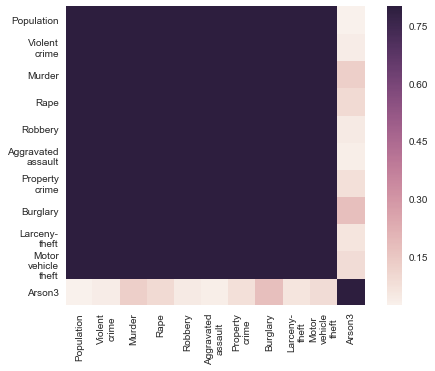

In [15]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, vmax=.8, square=True)

In [16]:
from IPython.display import display
display(correlation_matrix)

Population  Violent\ncrime    Murder      Rape  \
Population               1.000000        0.998854  0.986758  0.990839   
Violent\ncrime           0.998854        1.000000  0.992098  0.994985   
Murder                   0.986758        0.992098  1.000000  0.997746   
Rape                     0.990839        0.994985  0.997746  1.000000   
Robbery                  0.998469        0.999923  0.993104  0.995438   
Aggravated\nassault      0.999134        0.999942  0.990843  0.994140   
Property\ncrime          0.996265        0.998059  0.995403  0.997843   
Burglary                 0.970578        0.978150  0.993733  0.992442   
Larceny-\ntheft          0.997946        0.998762  0.993175  0.996260   
Motor\nvehicle\ntheft    0.992421        0.996271  0.997992  0.998764   
Arson3                   0.023680        0.040651  0.128936  0.093916   

                        Robbery  Aggravated\nassault  Property\ncrime  \
Population             0.998469             0.999134         0.996265   
Violent\ncrime         0.999923             0.999942         0.998059   
Murder                 0.993104             0.990843         0.995403   
Rape                   0.995438             0.994140         0.997843   
Robbery                1.000000             0.999742         0.998237   
Aggravated\nassault    0.999742             1.000000         0.997622   
Property\ncrime        0.998237             0.997622         1.000000   
Burglary               0.979525             0.976288         0.987137   
Larceny-\ntheft        0.998735             0.998561         0.999666   
Motor\nvehicle\ntheft  0.996927             0.995403         0.998302   
Arson3                 0.046528             0.034251         0.076784   

                       Burglary  Larceny-\ntheft  Motor\nvehicle\ntheft  \
Population             0.970578         0.997946               0.992421   
Violent\ncrime         0.978150         0.998762               0.996271   
Murder                 0.993733         0.993175               0.997992   
Rape                   0.992442         0.996260               0.998764   
Robbery                0.979525         0.998735               0.996927   
Aggravated\nassault    0.976288         0.998561               0.995403   
Property\ncrime        0.987137         0.999666               0.998302   
Burglary               1.000000         0.982700               0.991464   
Larceny-\ntheft        0.982700         1.000000               0.996878   
Motor\nvehicle\ntheft  0.991464         0.996878               1.000000   
Arson3                 0.174057         0.061608               0.089692   

                         Arson3  
Population             0.023680  
Violent\ncrime         0.040651  
Murder                 0.128936  
Rape                   0.093916  
Robbery                0.046528  
Aggravated\nassault    0.034251  
Property\ncrime        0.076784  
Burglary               0.174057  
Larceny-\ntheft        0.061608  
Motor\nvehicle\ntheft  0.089692  
Arson3                 1.000000

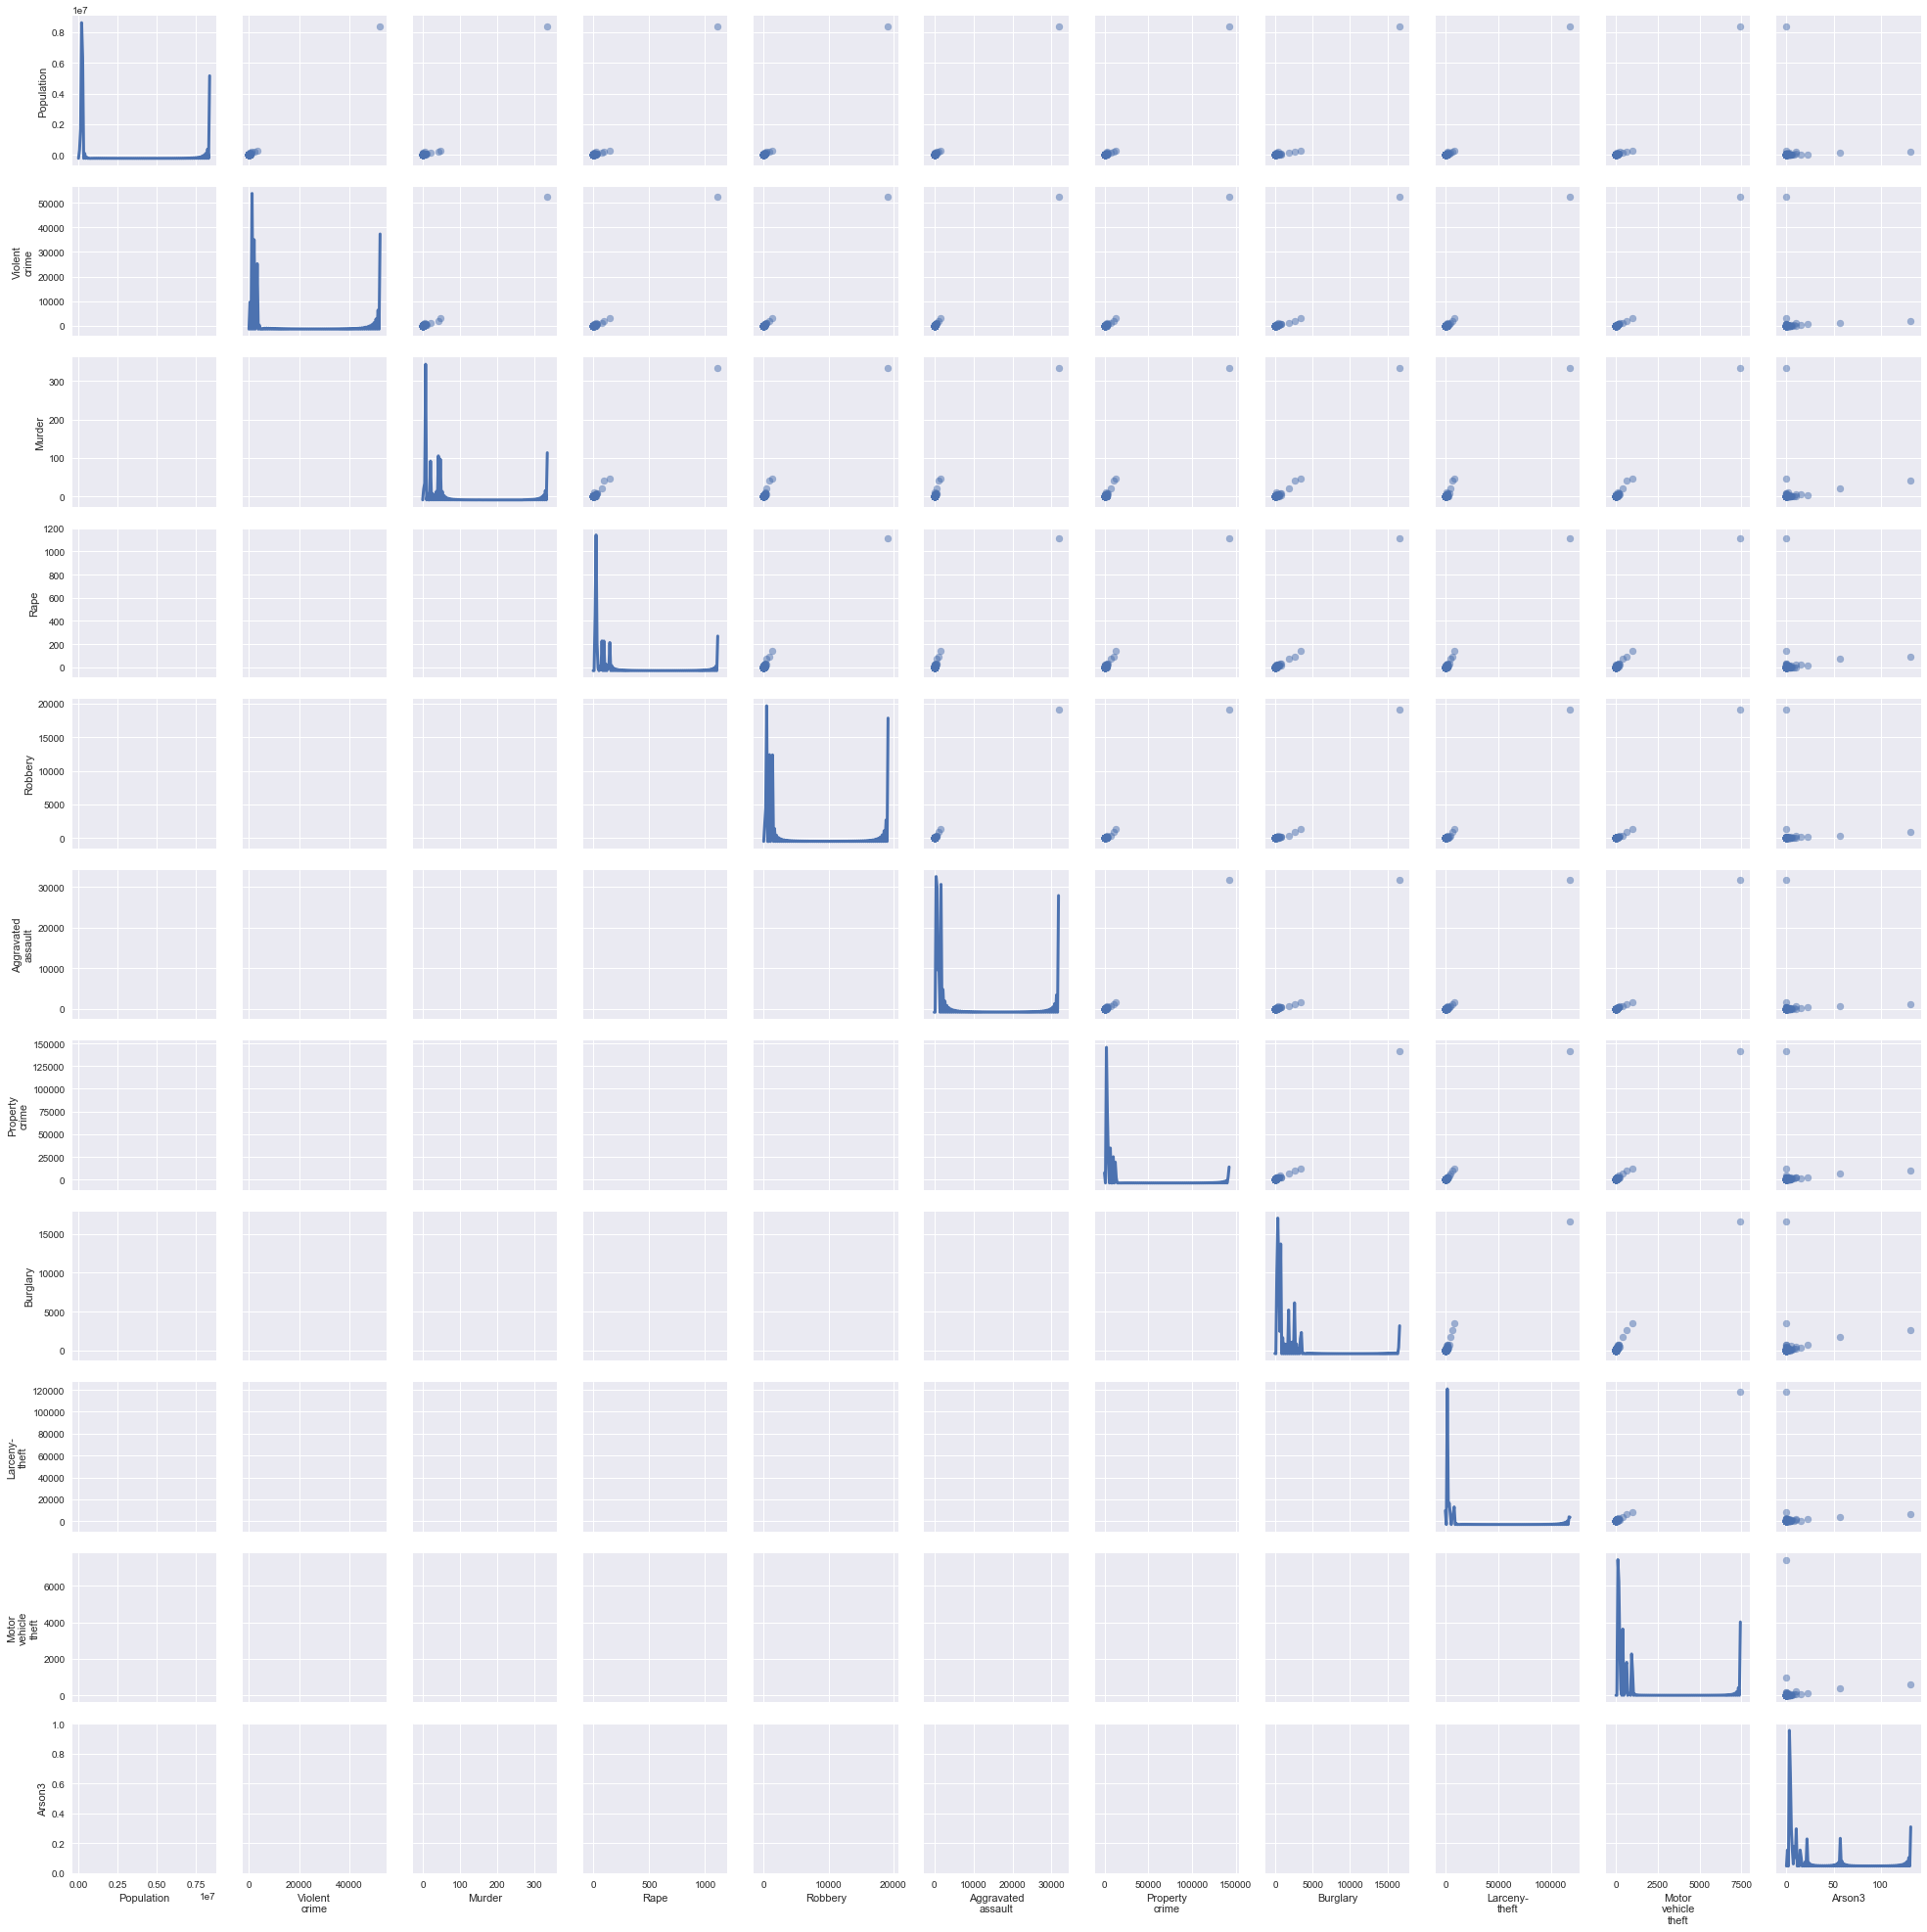

In [17]:
g = sns.PairGrid(df, diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
g.map_diag(sns.kdeplot, lw=3)
plt.show()

C:\Users\Vadim\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)
C:\Users\Vadim\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


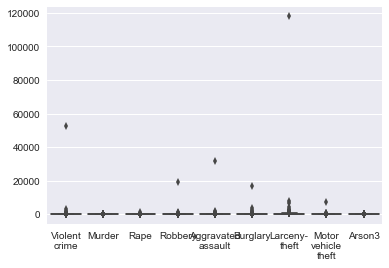

In [14]:
pr=df.drop(['City', 'Population','Property\ncrime'],axis=1)
sns.boxplot(pr)

In [20]:
#  some test function just to try
df['robCode']=df['Robbery'].apply(lambda x: 1 if x > 0 else 0)
df['murderCode']=df['Murder'].apply(lambda x: 1 if x > 0 else 0)

df['PropertyCrime']=(df['Population'] + df['Population']**2)*100 + df['robCode']*10 + df['murderCode']

#### my own model:  
 Should work with the following assumptions:
* linear relationship. Make necessary transformation for chosen features: whatever works ? box-cox
* error from model should be distributed normally
* error from the model should be consistent for all predicted values
* Correlations among features should be low

Plan for the test 
* first split category, property crime (Y) and the model 
* 


In [22]:
# make the dataset for the model
pr=df.drop(['City', 'Property\ncrime'],axis=1)


In [25]:
pr.astype(bool).sum(axis=0)
# count non 0 as result we can't use coxbox 

Population        348
Violent\ncrime    297
Murder             49
Rape              144
Robbery           209
Assalt            282
Burglary          327
Larceny           341
Car_theft         255
Arson3             54
dtype: int64

In [40]:

pt = PowerTransformer(standardize=False)
# defaults : method=’yeo-johnson’, standardize=True, copy=True
ftd=pt.fit_transform(pr)


C:\Users\Vadim\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:2778: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [48]:
# pca
pca = PCA(n_components=3)
pcs = pca.fit_transform(pr)

In [50]:
# now we need to repeat this  with cross validation / holdout 
#and calculate rmse 

#split  data 
y=df['Property\ncrime']
X_train, X_test, y_train, y_test = train_test_split(pcs, y, test_size=0.2, random_state=20)

# now fit and get the model on train data
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
# try 
y_pred= regr.predict(X_train)
resid = y_train - y_pred
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR2-squared:' )

#print(regr.score(pr_t.ravel, y_train.ravel))
from sklearn.metrics import r2_score
print(r2_score(y_train, y_pred))
# need two separate things fit and model with clear comments on what exactly they are doing 
#


Coefficients: 
 [  3.28397295e-17   2.51081430e-14   1.02269207e-13  -2.33895549e-14
  -3.47061514e-14  -1.93158715e-14   1.00000000e+00   1.00000000e+00
   1.00000000e+00   2.86799122e-15]

Intercept: 
 -7.38964445191e-13

R2-squared:
1.0


In [47]:
#
# now try model on test part
#
ytest_pred= regr.predict(X_test)
resid = y_test - ytest_pred
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR2-squared on test data after applying pca'  )
print(r2_score(y_test, ytest_pred))



Coefficients: 
 [ 0.01884899  1.32072008  0.10859291]

Intercept: 
 837.594182279

R2-squared on test data after applying pca
0.987174888128


In [51]:
from sklearn.model_selection import cross_val_score
data=pcs
target =y
cv_scores = cross_val_score(regr , data, target, cv=5)
print("cross_val_scores: ", cv_scores, 'mean for cv_scores', np.mean(cv_scores))

cross_val_scores:  [ 0.99905371  0.9932983   0.99174442  0.98754438  0.99569042] mean for cv_scores 0.993466245126


In [55]:
#rmse 
from sklearn.metrics import mean_squared_error
from math import sqrt    

rms = sqrt(mean_squared_error( y_train , y_pred))
print(" root of  mean_squared_error", rms)

 root of  mean_squared_error 1.7005199833668411e-12


In [56]:
rms = sqrt(mean_squared_error( y_test , ytest_pred))
print(" root of  mean_squared_error", rms)

 root of  mean_squared_error 1905.1665004022557


In [ ]:
# too bad 
